In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord
from matplotlib.gridspec import GridSpec
from datetime import datetime


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/2tb_ext_hd/hddata/meats/hst/toi-260/'
stispath = '{}stis/'.format(path)
cospath = '{}cos/'.format(path)

In [3]:
x1ds = np.hstack((glob.glob('{}*0_x1d.fits'.format(stispath)), glob.glob('{}*sx1.fits'.format(stispath))))#, glob.glob('{}*x1dsum.fits'.format(path))))
x1ds

array(['/media/david/2tb_ext_hd/hddata/meats/hst/toi-260/stis/oeoo10010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-260/stis/oeoo10020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-260/stis/oeoo10030_sx1.fits'],
      dtype='<U72')

/media/david/2tb_ext_hd/hddata/meats/hst/toi-260/stis/oeoo10010_x1d.fits
G140M
[716.3372]


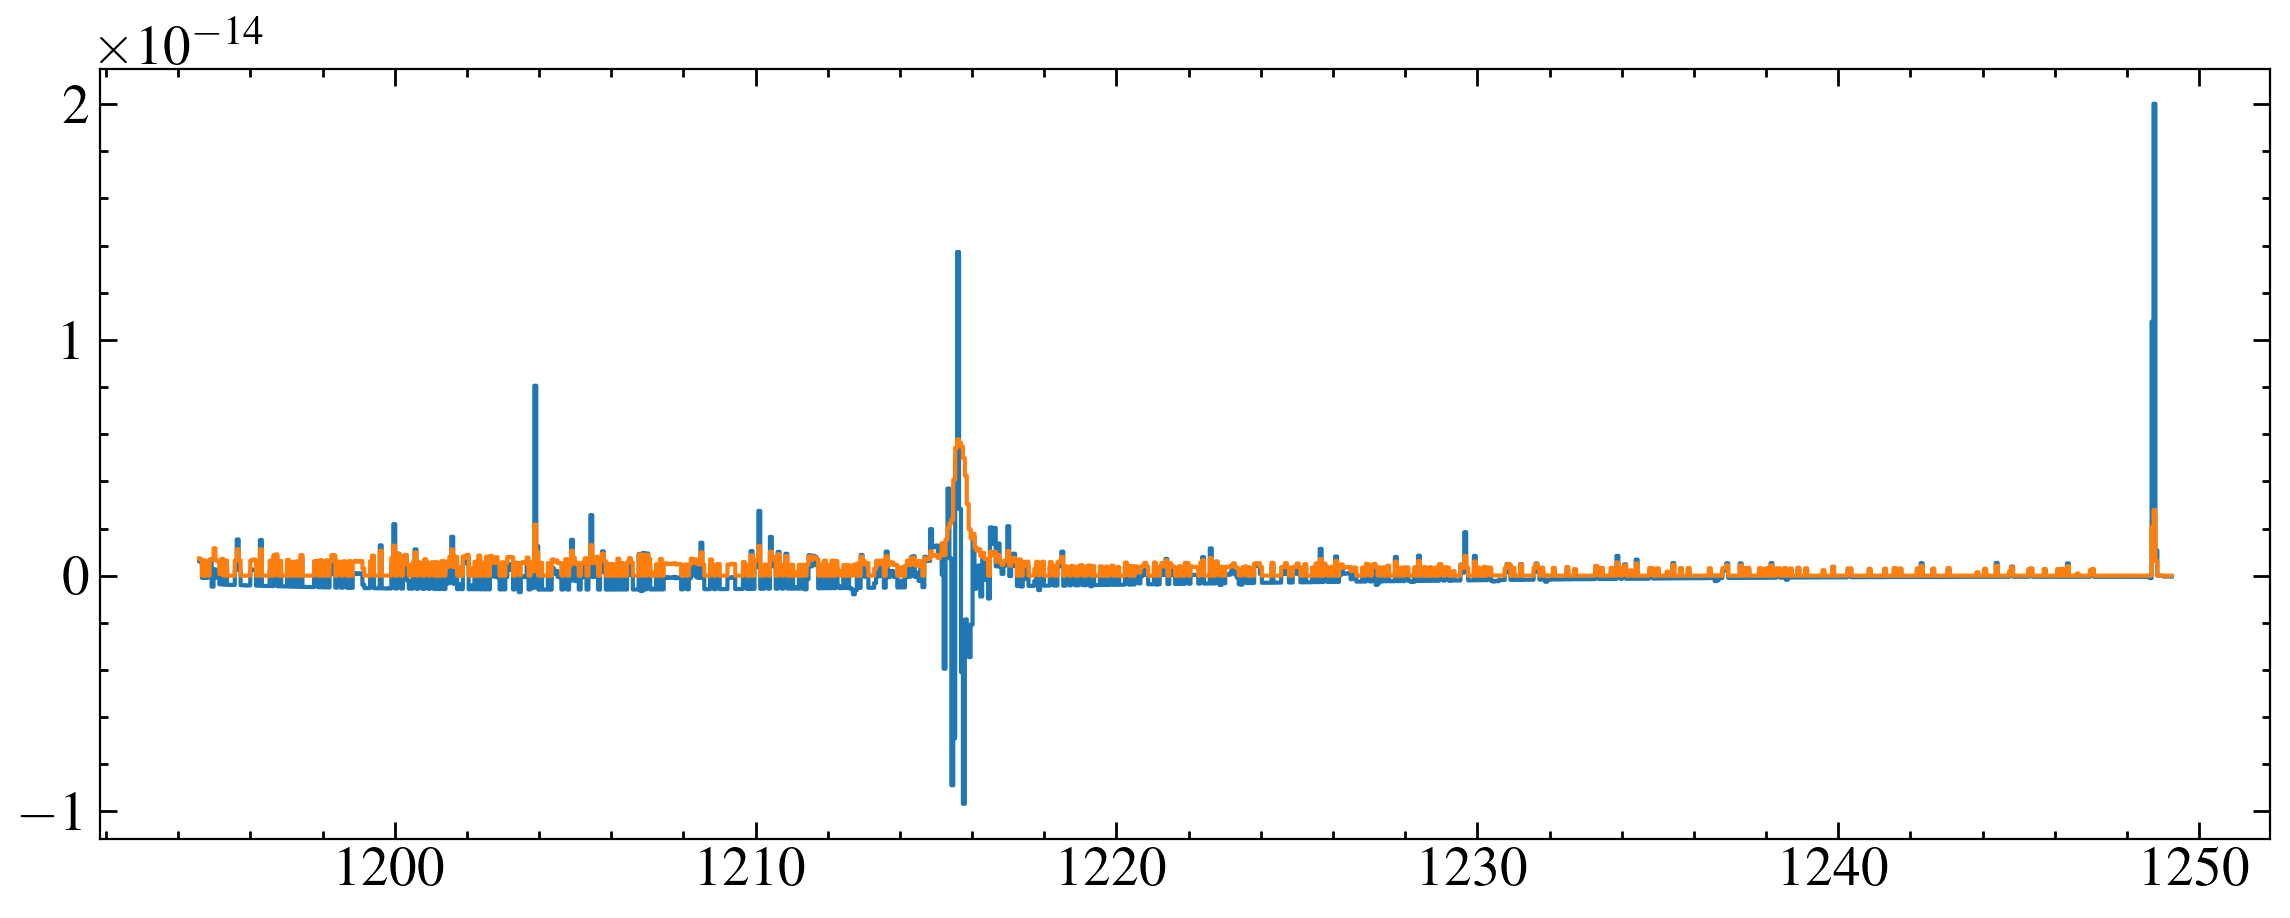

/media/david/2tb_ext_hd/hddata/meats/hst/toi-260/stis/oeoo10020_x1d.fits
G230L
[511.09988]


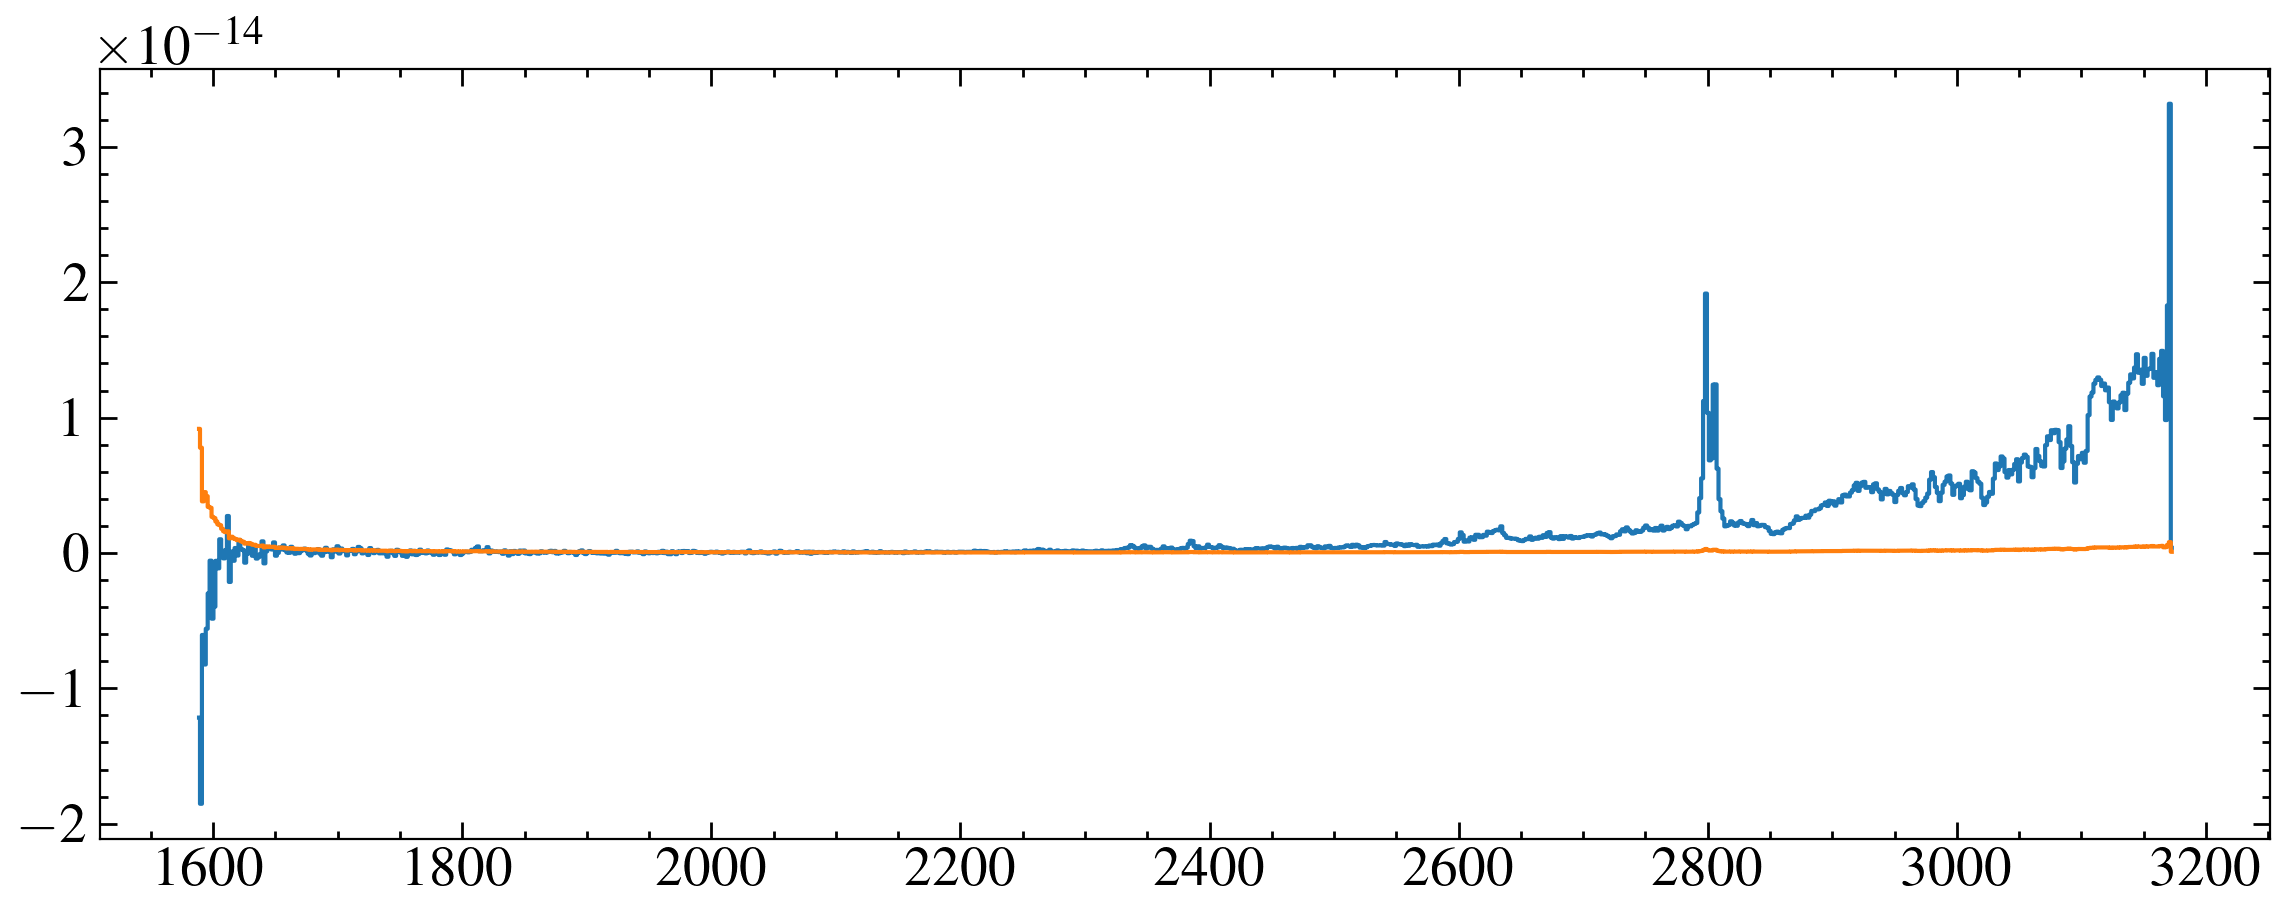

/media/david/2tb_ext_hd/hddata/meats/hst/toi-260/stis/oeoo10030_sx1.fits
G430L
[895.18427]


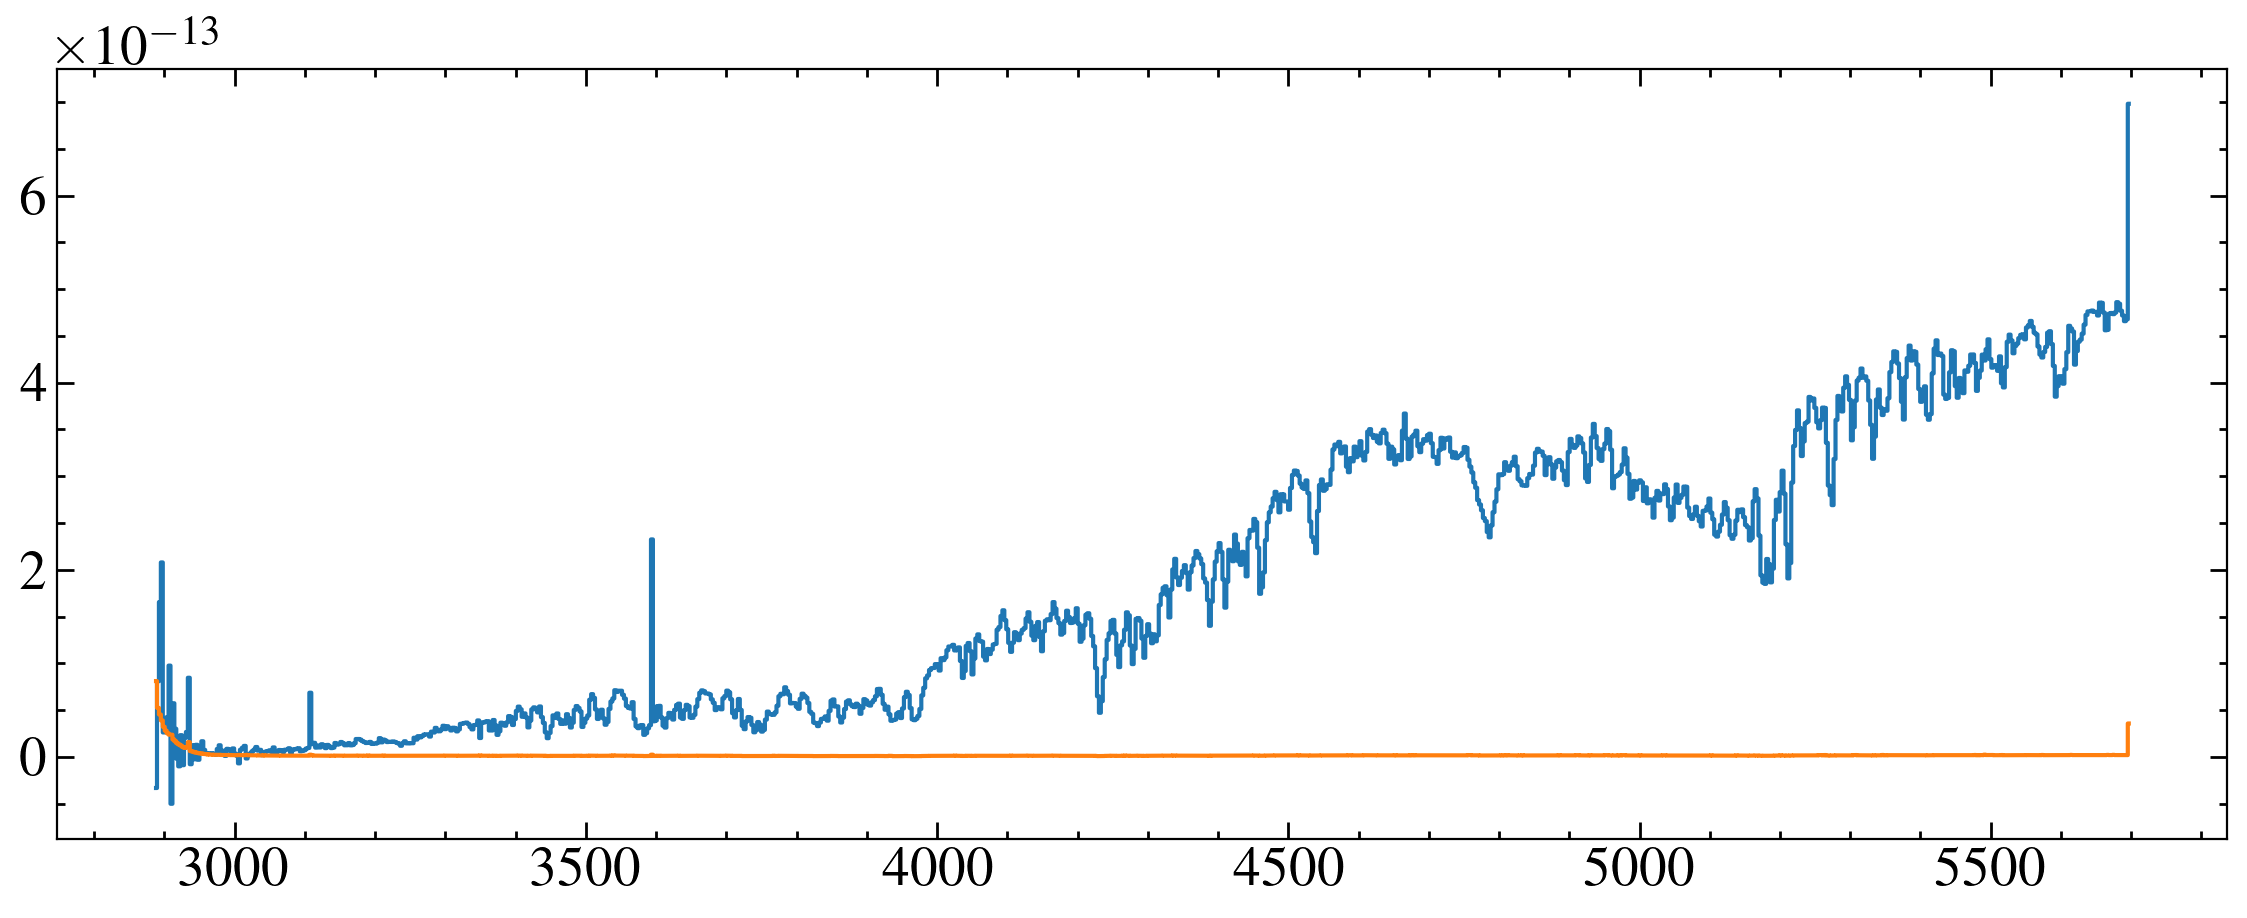

In [4]:
for x in x1ds:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1160
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', c='C0')
    plt.step(w, e, where='mid', c='C1')
    plt.show()


Need to reextract G140M but it's clearly visible in the flt. COS first though

In [6]:
x1dpath = '/media/david/2tb_ext_hd/hddata/meats/hst/toi-260/cos/leoo11010_x1dsum.fits'
xdata = fits.getdata(x1dpath, 1)

cdata = Table.read('cos_files/toi-260/TOI260_COS130M_Mm1_NOSCL_07aug2024.sav.txt', format='ascii.basic')

['/media/david/2tb_ext_hd/hddata/meats/hst/toi-260/cos/leoo11010_x1dsum.fits']
['/media/david/2tb_ext_hd/hddata/meats/hst/toi-260/cos/leoo11010_x1dsum.fits']


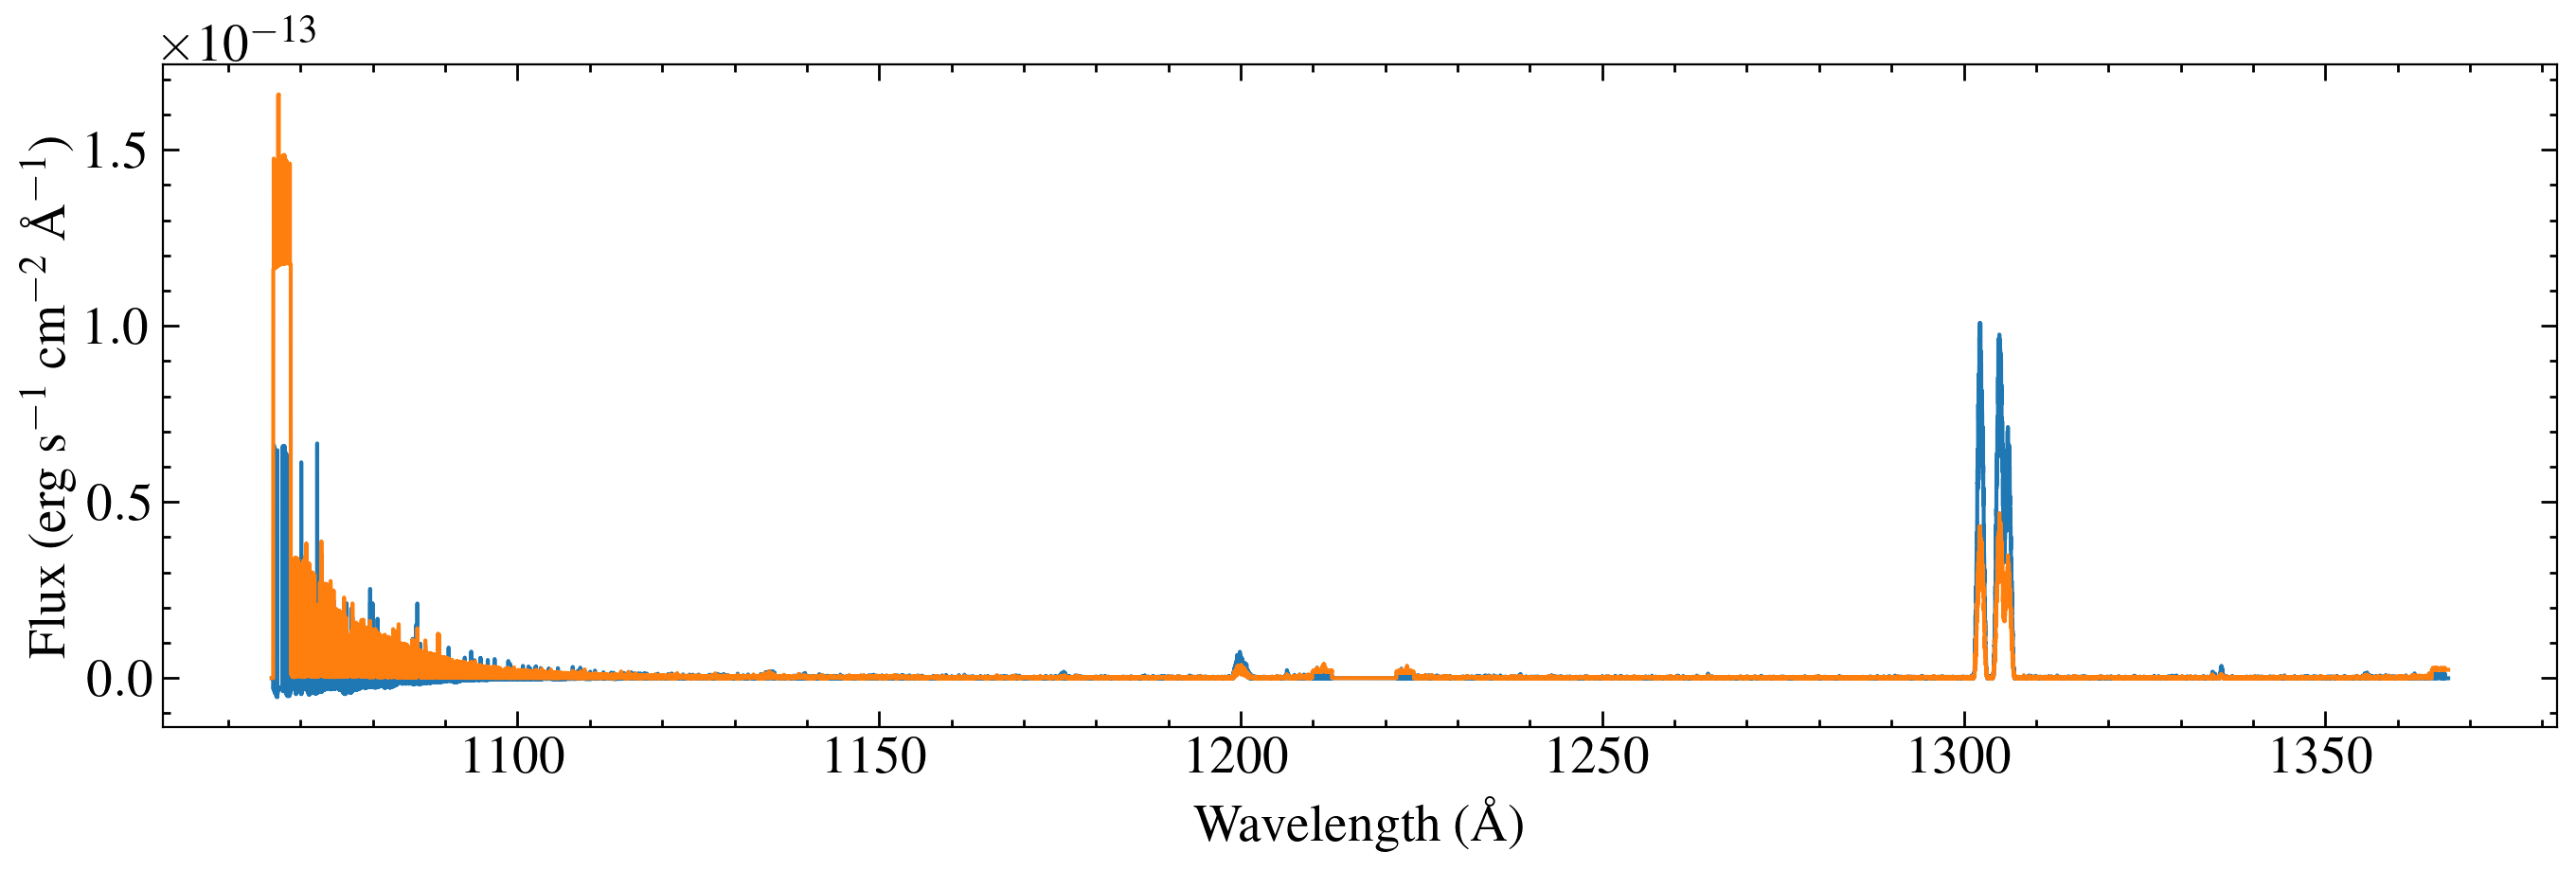

Spectrum saved as hlsp_muscles_hst_cos_toi-260_g130m_v1_component-spec.fits


In [9]:
import prepare_cos
# importlib.reload(prepare_cos)

savpath = 'cos_files/toi-260/TOI260_COS130M_Mm1_NOSCL_07aug2024.sav.txt'
x1dpath = '/media/david/2tb_ext_hd/hddata/meats/hst/toi-260/cos/'
hlsp = 'meats_hlsp_info.csv'
version = 1
savepath = 'draft_hlsp/toi-260/'
# star = 
prepare_cos.make_cos_spectrum(savpath, version, x1dpath, hlsp, savepath = savepath, plot=True, save_fits=True, star='TOI-260')